In [60]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARMA,ARMAResults,ARIMA,ARIMAResults
from statsmodels.tsa.statespace.sarimax import SARIMAX

from pmdarima import auto_arima # for determining ARIMA orders
%matplotlib inline
#ignore harmless warnings
import warnings 
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_absolute_error

In [61]:
df = pd.read_csv("../csv-files/mid-2017-2019-datetime.csv", index_col=[0], parse_dates=[0])
df.head()

,Price,Volume,Settlement Period,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
datetime,,,,,,,,,,,
2017-01-01 00:00:00,44.90,505.00,1,0.0,Sun,1.0,Jan,2017.0,1.0,1.0,52.0
2017-01-01 00:30:00,47.13,559.15,2,0.0,Sun,1.0,Jan,2017.0,1.0,1.0,52.0
2017-01-01 01:00:00,45.62,649.35,3,1.0,Sun,1.0,Jan,2017.0,1.0,1.0,52.0
2017-01-01 01:30:00,44.05,712.65,4,1.0,Sun,1.0,Jan,2017.0,1.0,1.0,52.0
2017-01-01 02:00:00,44.83,599.15,5,2.0,Sun,1.0,Jan,2017.0,1.0,1.0,52.0


In [62]:
df_gas = pd.read_csv("../csv-files/gas_data.csv",index_col=[0], parse_dates=[0],encoding = "ISO-8859-1")
df_gas.head()


,SAP(£/MWh),EU ETS (£/MWh),Gas (£/MWh)
Date,,,
2016-01-01,10.44,1.099207,14.848207
2016-01-02,10.29,1.099207,14.700207
2016-01-03,10.44,1.099207,14.853207
2016-01-04,11.22,1.099207,15.635207
2016-01-05,11.25,1.090321,15.654321


In [63]:
df=pd.read_csv("../csv-files/mid-gas-2017-2019.csv",index_col=[0], parse_dates=[0])
df.head()

,Price,Volume,Settlement Period,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,SAP,EU_ETS,Gas
datetime,,,,,,,,,,,,,,
2017-01-01 00:00:00,44.90,505.00,1,0.0,Sun,1.0,Jan,2017.0,1.0,1.0,52.0,16.95,1.033832,21.294832
2017-01-01 00:30:00,47.13,559.15,2,0.0,Sun,1.0,Jan,2017.0,1.0,1.0,52.0,16.95,1.033832,21.294832
2017-01-01 01:00:00,45.62,649.35,3,1.0,Sun,1.0,Jan,2017.0,1.0,1.0,52.0,16.95,1.033832,21.294832
2017-01-01 01:30:00,44.05,712.65,4,1.0,Sun,1.0,Jan,2017.0,1.0,1.0,52.0,16.95,1.033832,21.294832
2017-01-01 02:00:00,44.83,599.15,5,2.0,Sun,1.0,Jan,2017.0,1.0,1.0,52.0,16.95,1.033832,21.294832


In [64]:
df_INDO=pd.read_csv('../csv-files/INDO-2017-2019.csv',index_col=[0],parse_dates=[0])

df_INDO.head(3)

,Settlement_Period,INDO
datetime,,
2017-01-01 00:00:00,1,27239
2017-01-01 00:30:00,2,27814
2017-01-01 01:00:00,3,27453


In [65]:
df=pd.merge(df,df_INDO['INDO'], how='inner', left_index=True, right_index=True)
df.head()

,Price,Volume,Settlement Period,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,SAP,EU_ETS,Gas,INDO
datetime,,,,,,,,,,,,,,,
2017-01-01 00:00:00,44.90,505.00,1,0.0,Sun,1.0,Jan,2017.0,1.0,1.0,52.0,16.95,1.033832,21.294832,27239
2017-01-01 00:30:00,47.13,559.15,2,0.0,Sun,1.0,Jan,2017.0,1.0,1.0,52.0,16.95,1.033832,21.294832,27814
2017-01-01 01:00:00,45.62,649.35,3,1.0,Sun,1.0,Jan,2017.0,1.0,1.0,52.0,16.95,1.033832,21.294832,27453
2017-01-01 01:30:00,44.05,712.65,4,1.0,Sun,1.0,Jan,2017.0,1.0,1.0,52.0,16.95,1.033832,21.294832,26312
2017-01-01 02:00:00,44.83,599.15,5,2.0,Sun,1.0,Jan,2017.0,1.0,1.0,52.0,16.95,1.033832,21.294832,25289


In [66]:
#Splitting the data:
def split_data(data, split_date):
    return data[data.index <= split_date].copy(), \
           data[data.index >  split_date].copy()

def limit(data, frm, to):
    return data[(data.index>=frm)&(data.index<to)]

In [67]:
df.sort_index(inplace=True)

In [68]:
t = df.Price.copy()
t = t.drop(t.index[t.index.duplicated()])
freq_index = pd.date_range(start=t.index[0], end=t.index[-1], freq='30T')
constructed = pd.Series(index=freq_index, name='Price')
constructed.update(t)
constructed.interpolate(inplace=True)


In [69]:
#for gas series:
g = df.Gas.copy()
g = g.drop(g.index[g.index.duplicated()])
freq_index = pd.date_range(start=g.index[0], end=g.index[-1], freq='30T')
constructed_gas = pd.Series(index=freq_index, name='Gas')
constructed_gas.update(g)
constructed_gas.interpolate(inplace=True)


In [70]:
#for INDO series:
i = df.INDO.copy()
i = i.drop(i.index[i.index.duplicated()])
freq_index = pd.date_range(start=i.index[0], end=i.index[-1], freq='30T')
constructed_indo = pd.Series(index=freq_index, name='INDO')
constructed_indo.update(i)
constructed_indo.interpolate(inplace=True)

In [71]:
train = limit(constructed, '2019-01-01', '2019-06-15')
test  = limit(constructed, '2019-06-15', '2019-07-01')
test.shape, train.shape



((768,), (7920,))

In [72]:
train_=df[df.index.isin(train.index).copy()]
train_.shape, train_gas.shape


((7810, 15), (7920,))

In [73]:
#Train and test for Gas Series:
train_gas = limit(constructed_gas, '2019-01-01', '2019-06-15')
test_gas  = limit(constructed_gas, '2019-06-15', '2019-07-01')
train_gas.shape, test_gas.shape




((7920,), (768,))

In [74]:
train_indo = limit(constructed_indo, '2019-01-01', '2019-06-15')
test_indo = limit(constructed_indo, '2019-06-15', '2019-07-01')
train_indo.shape,test_indo.shape


((7920,), (768,))

In [75]:
test_gas=df[df.index.isin(test.index)].copy()
test_gas[['Gas']].shape


(768, 1)

In [76]:
test_indo=df[df.index.isin(test_indo.index)].copy()
test_indo[['INDO']].shape


(768, 1)

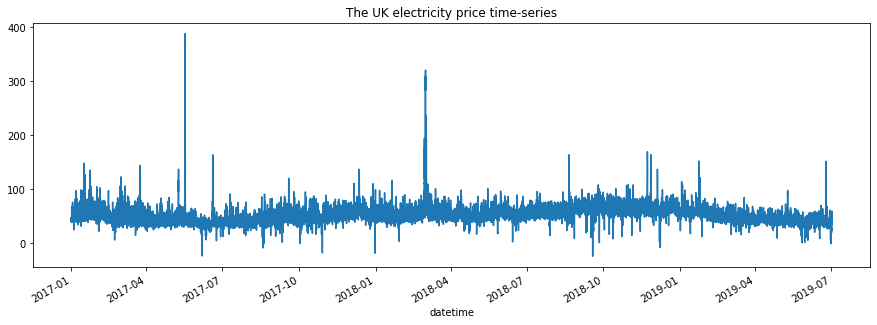

In [27]:
df['Price'].plot(figsize=(15, 5), title = 'The UK electricity price time-series')

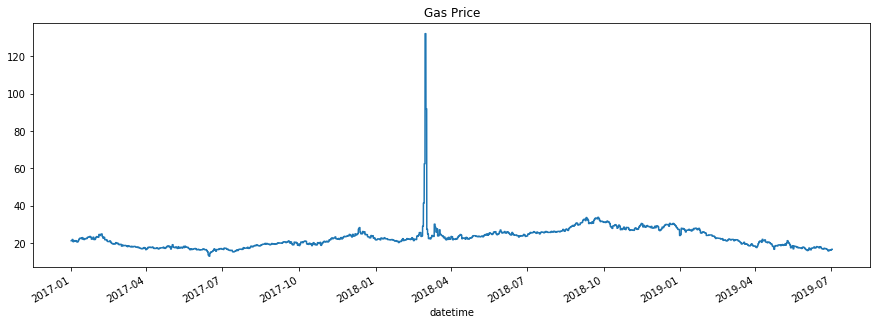

In [28]:
df['Gas'].plot(figsize=(15, 5), title = 'Gas Price')

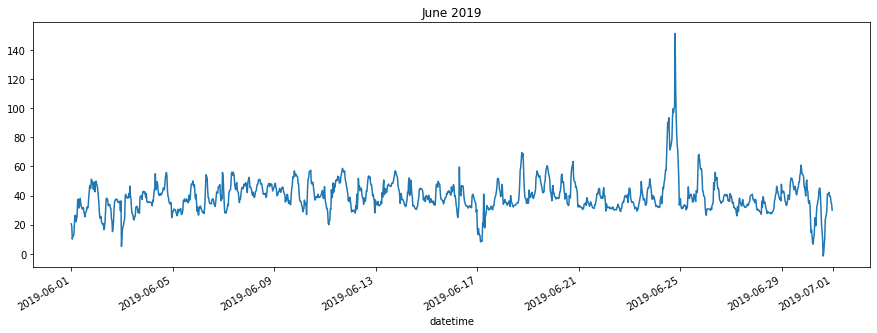

In [29]:
df['Price'].loc[(df['Price'].index >= '2019-06-01') &
               (df['Price'].index < '2019-07-01')] \
    .plot(figsize=(15, 5), title = 'June 2019')

In [30]:
#ACF and PACF
from statsmodels.tsa.stattools import acovf,acf,pacf,pacf_yw,pacf_ols
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

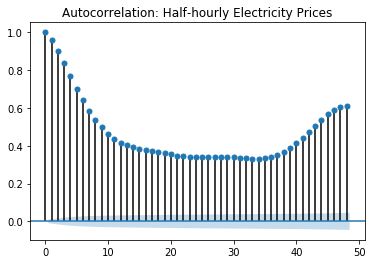

In [31]:
title = 'Autocorrelation: Half-hourly Electricity Prices'
lags = 48
plot_acf(df['Price'],title=title,lags=lags);
#This plot indicates non-stationary data, as there are a large number of lags before ACF values drop off.

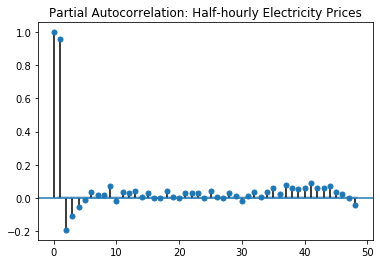

In [32]:
title='Partial Autocorrelation: Half-hourly Electricity Prices'
lags=48
plot_pacf(df['Price'],title=title,lags=lags);

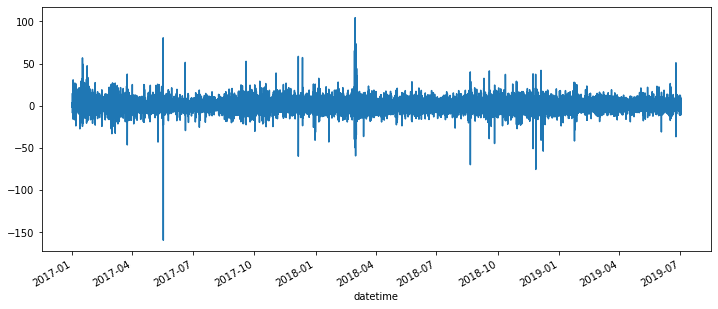

In [33]:
#First order differencing:
from statsmodels.tsa.statespace.tools import diff

df['d1'] = diff(df['Price'],k_diff=1)
df['d1'].plot(figsize=(12,5));

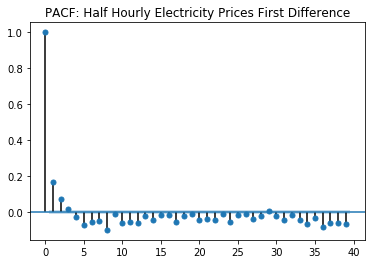

In [25]:
title='PACF: Half Hourly Electricity Prices First Difference'
lags=40
plot_pacf(df['d1'].dropna(),title=title,lags=np.arange(lags));  # be sure to add .dropna() here!

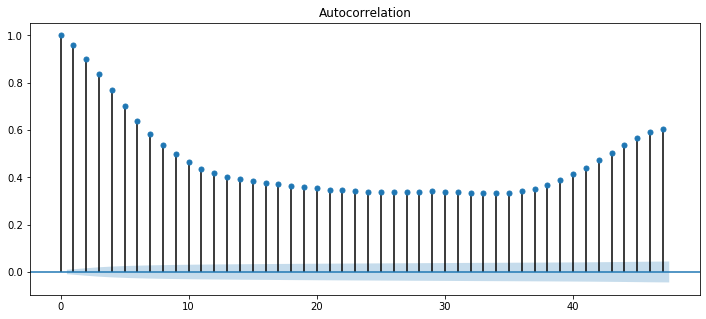

In [26]:
# full autocorrelation plot, it helps to increase the figure size using matplotlib:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,5))

plot_acf(df['Price'],ax=ax);

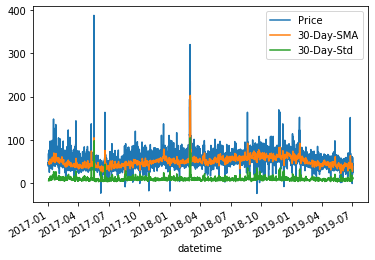

In [27]:
df['30-Day-SMA'] = df['Price'].rolling(window=48).mean()
df['30-Day-Std'] = df['Price'].rolling(window=48).std()

df[['Price','30-Day-SMA','30-Day-Std']].plot();

In [28]:
#Stationary Function
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [29]:
adf_test(df['Price'],'Stationarity test')

Augmented Dickey-Fuller Test: Stationarity test
ADF test statistic     -1.233837e+01
p-value                 6.198693e-23
# lags used             5.400000e+01
# observations          4.333600e+04
critical value (1%)    -3.430501e+00
critical value (5%)    -2.861607e+00
critical value (10%)   -2.566806e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [ ]:
auto_arima(df['Price'],error_action='ignore').summary()

In [ ]:
stepwise_fit = auto_arima(df['Price'], start_p=0, start_q=0,
                          max_p=6, max_q=3, m=12,
                          seasonal=False,
                          d=None, trace=True,
                          error_action='ignore',   # we don't want to know if an order does not work
                          suppress_warnings=True,  # we don't want convergence warnings
                          stepwise=True)           # set to stepwise

stepwise_fit.summary()

In [33]:
#ARMA Model:
model = ARMA(train,order=(5,1))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Price   No. Observations:                 7920
Model:                     ARMA(5, 1)   Log Likelihood              -21028.753
Method:                       css-mle   S.D. of innovations              3.442
Date:                Wed, 24 Jun 2020   AIC                          42073.506
Time:                        19:40:00   BIC                          42129.323
Sample:                    01-01-2019   HQIC                         42092.621
                         - 06-14-2019                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          46.4411      0.676     68.687      0.000      45.116      47.766
ar.L1.Price     0.8726      0.331      2.637      0.008       0.224       1.521
ar.L2.Price     0.2097      0.360      0.582      0.560      -0.496       0.916
ar.L3.Price    -0.0503      0.017     -3.027      0.002      -0.083      -0.018
ar.L4.Price    -0.0616      0.022     -2.740      0.006      -0.106      -0.018
ar.L5.Price    -0.0397      0.026     -1.506      0.132      -0.091       0.012
ma.L1.Price     0.2135      0.331      0.645      0.519      -0.435       0.862
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1144           -0.0000j            1.1144           -0.0000
AR.2            1.4967           -0.0000j            1.4967           -0.0000
AR.3           -2.4179           -0.0000j            2.4179           -0.5000
AR.4           -0.8731           -2.3429j            2.5003           -0.3068
AR.5           -0.8731           +2.3429j            2.5003            0.3068
MA.1           -4.6844           +0.0000j            4.6844            0.5000
-----------------------------------------------------------------------------
"""

In [34]:
start=len(train)
end=len(train)+len(test)-1
start
predictions = results.predict(start=start, end=end).rename('ARMA(5,1) Predictions')

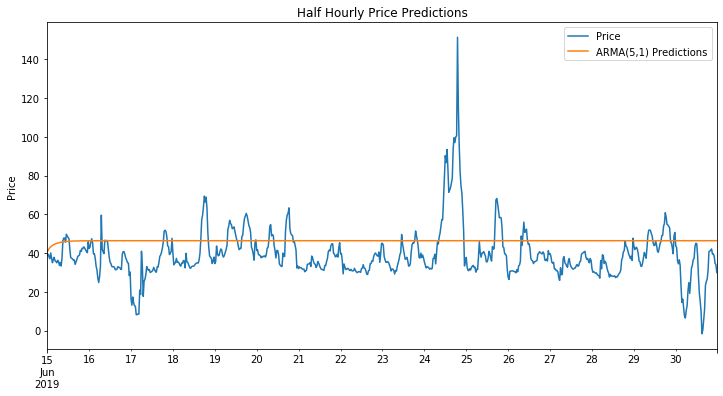

In [35]:
title = 'Half Hourly Price Predictions'
ylabel='Price'
xlabel=''

ax = test.plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

In [36]:
#Model Evaluation
from statsmodels.tools.eval_measures import mse,rmse
from sklearn.metrics import mean_absolute_error

error1 = mse(test, predictions)
error2 = rmse(test, predictions)

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print(f'MAE Error: {mean_absolute_error(test, predictions)}'), 
print(f'MAPE Error: {mean_absolute_percentage_error(test, predictions)}')
print(f'MSE Error : {error1:11.10}')
print(f'RMSE Error: {error2:11.10}')
print()


MAE Error: 11.474372917765232
MAPE Error: 53.33711107150668
MSE Error : 216.3757675
RMSE Error: 14.70971677



In [38]:
#ARIMA MODELS
model =ARIMA(train,order=(4,1,3))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Price   No. Observations:                 7919
Model:                 ARIMA(4, 1, 3)   Log Likelihood              -20923.237
Method:                       css-mle   S.D. of innovations              3.398
Date:                Wed, 24 Jun 2020   AIC                          41864.475
Time:                        19:40:40   BIC                          41927.268
Sample:                    01-01-2019   HQIC                         41885.979
                         - 06-14-2019                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0019      0.004     -0.473      0.637      -0.010       0.006
ar.L1.D.Price     0.6440      0.040     15.908      0.000       0.565       0.723
ar.L2.D.Price     0.9121      0.025     36.672      0.000       0.863       0.961
ar.L3.D.Price    -0.5686      0.037    -15.204      0.000      -0.642      -0.495
ar.L4.D.Price    -0.0868      0.015     -5.682      0.000      -0.117      -0.057
ma.L1.D.Price    -0.5772      0.040    -14.570      0.000      -0.655      -0.500
ma.L2.D.Price    -0.9070      0.019    -48.605      0.000      -0.944      -0.870
ma.L3.D.Price     0.4943      0.038     13.039      0.000       0.420       0.569
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.0915           -0.0000j            1.0915           -0.5000
AR.2            1.1490           -0.2008j            1.1664           -0.0275
AR.3            1.1490           +0.2008j            1.1664            0.0275
AR.4           -7.7545           -0.0000j            7.7545           -0.5000
MA.1           -1.0613           +0.0000j            1.0613            0.5000
MA.2            1.0112           +0.0000j            1.0112            0.0000
MA.3            1.8849           +0.0000j            1.8849            0.0000
-----------------------------------------------------------------------------
"""

In [39]:
start=len(train)
end=len(train)+len(test)-1
predictions_arima = results.predict(start=start, end=end).rename('ARIMA(2,1,1) Predictions')

In [40]:
from statsmodels.tools.eval_measures import mse,rmse
from sklearn.metrics import mean_absolute_error

error1 = mse(test, predictions_arima)
error2 = rmse(test, predictions_arima)

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print(f'MAE Error: {mean_absolute_error(test, predictions_arima)}'), 
print(f'MAPE Error: {mean_absolute_percentage_error(test, predictions_arima)}')
print(f'MSE Error : {error1:11.10}')
print(f'RMSE Error: {error2:11.10}')
print()

MAE Error: 39.35816383461239
MAPE Error: 100.00180352628276
MSE Error : 1715.709105
RMSE Error: 41.42111907



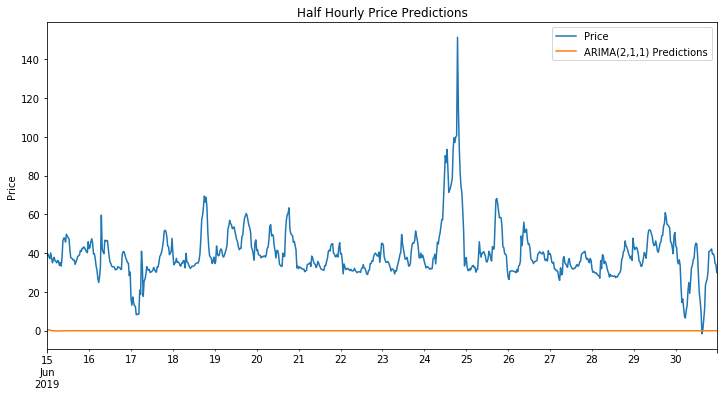

In [41]:
title = 'Half Hourly Price Predictions'
ylabel='Price'
xlabel='' 

ax = test.plot(legend=True,figsize=(12,6),title=title)
predictions_arima.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

[Text(0, 0.5, 'Prices'), Text(0.5, 0, '')]

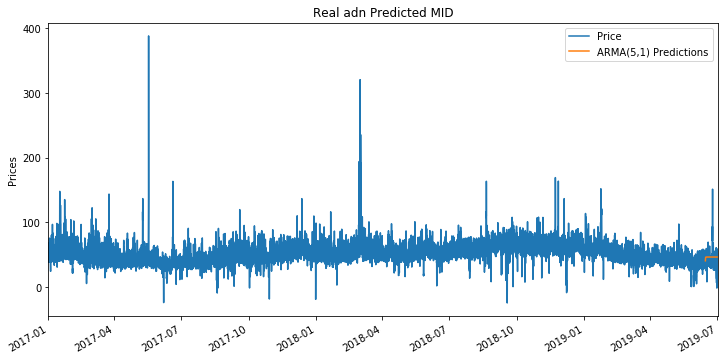

In [42]:
# Plot predictions against known values
title = 'Real adn Predicted MID'
ylabel='Prices'
xlabel='' 
ax = df['Price'].plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
#ax.yaxis.set_major_formatter(formatter);

In [42]:
train.shape, train_gas.shape

((7920,), (42960,))

In [89]:
#Sarima with gas:
model = SARIMAX(train,order=(5,1,1),seasonal_order=(1,0,1,48),
                exog=train_gas,
               enforce_stationarity=False,
               enforce_invertibility=False
               )
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Price   No. Observations:                 7920
Model:             SARIMAX(5, 1, 1)x(1, 0, 1, 48)   Log Likelihood              -19690.341
Date:                            Wed, 24 Jun 2020   AIC                          39400.681
Time:                                    20:32:46   BIC                          39470.384
Sample:                                01-01-2019   HQIC                         39424.559
                                     - 06-14-2019                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Gas            0.1625      0.278      0.585      0.558      -0.382       0.707
ar.L1          1.0329      0.008    135.582      0.000       1.018       1.048
ar.L2         -0.0614      0.011     -5.484      0.000      -0.083      -0.039
ar.L3          0.0037      0.014      0.272      0.785      -0.023       0.030
ar.L4         -0.0648      0.014     -4.495      0.000      -0.093      -0.037
ar.L5          0.0195      0.009      2.142      0.032       0.002       0.037
ma.L1         -1.0000      0.006   -160.672      0.000      -1.012      -0.988
ar.S.L48       0.9809      0.002    568.343      0.000       0.977       0.984
ma.S.L48      -0.8787      0.005   -186.563      0.000      -0.888      -0.870
sigma2         8.6681      0.089     97.728      0.000       8.494       8.842
===================================================================================
Ljung-Box (Q):                       77.88   Jarque-Bera (JB):             31452.72
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.01   Skew:                             0.20
Prob(H) (two-sided):                  0.73   Kurtosis:                        12.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [37]:
train.shape

(7920,)

In [90]:
# Obtain predicted values
start=len(train)
end=len(train)+len(test)-1
exog_forecast=test_gas[['Gas']]
predictions_sarima = results.predict(start=start, end=end,exog=exog_forecast, dynamic=False, typ='levels').rename('SARIMAX(5,1,1)(1,0,1,48) Predictions')
#predictions_sarima = results.predict(start=start, end=end,  
 #                                    dynamic=False,
  #                                   typ='levels').rename('SARIMAX(5,1,1)(1,0,1,12) Predictions')

In [51]:
predictions_sarima.shape


(768,)

In [91]:
from statsmodels.tools.eval_measures import mse,rmse
from sklearn.metrics import mean_absolute_error

error1 = mse(test, predictions_sarima)
error2 = rmse(test, predictions_sarima)

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print(f'MAE Error: {mean_absolute_error(test, predictions_sarima)}'), 
print(f'MAPE Error: {mean_absolute_percentage_error(test, predictions_sarima)}')
print(f'MSE Error : {error1:11.10}')
print(f'RMSE Error: {error2:11.10}')
print()

MAE Error: 7.514702217038153
MAPE Error: 36.00255620270549
MSE Error : 142.4977754
RMSE Error: 11.93724321



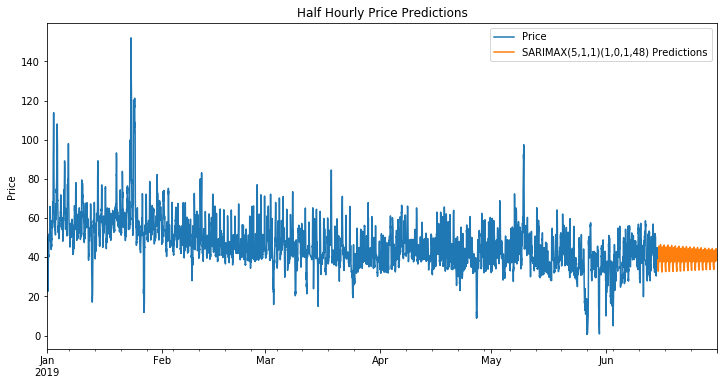

In [92]:
title = 'Half Hourly Price Predictions'
ylabel='Price'
xlabel='' 

ax = train.plot(legend=True,figsize=(12,6),title=title)
predictions_sarima.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

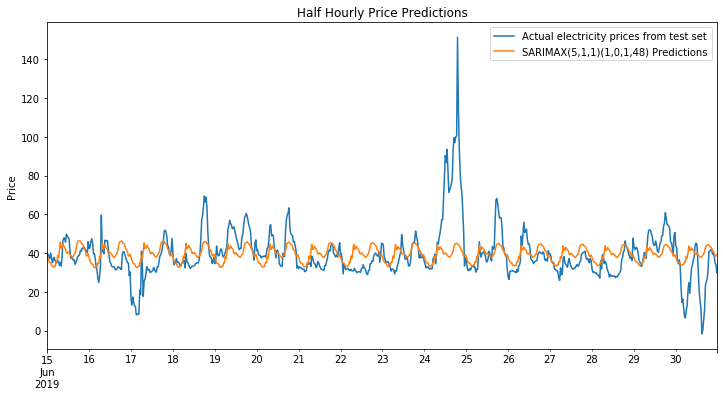

In [93]:
title = 'Half Hourly Price Predictions'
ylabel='Price'
xlabel='' 
ax = test.rename('Actual electricity prices from test set').plot(legend=True,figsize=(12,6),title=title)
predictions_sarima.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

In [84]:
#SARIMA with INDO:
model = SARIMAX(train,order=(5,1,1),seasonal_order=(1,0,1,48),
                exog=train_indo,
               enforce_stationarity=False,
               enforce_invertibility=False
               )
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Price   No. Observations:                 7920
Model:             SARIMAX(5, 1, 1)x(1, 0, 1, 48)   Log Likelihood              -19765.011
Date:                            Wed, 24 Jun 2020   AIC                          39550.021
Time:                                    20:22:56   BIC                          39619.724
Sample:                                01-01-2019   HQIC                         39573.900
                                     - 06-14-2019                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
INDO           0.0009   6.07e-05     15.622      0.000       0.001       0.001
ar.L1          0.0338      0.503      0.067      0.947      -0.953       1.020
ar.L2         -0.0102      0.028     -0.368      0.713      -0.065       0.044
ar.L3         -0.0023      0.012     -0.197      0.844      -0.025       0.021
ar.L4         -0.0579      0.009     -6.240      0.000      -0.076      -0.040
ar.L5         -0.0183      0.032     -0.563      0.574      -0.082       0.045
ma.L1          0.0176      0.503      0.035      0.972      -0.969       1.004
ar.S.L48       0.9760      0.002    489.180      0.000       0.972       0.980
ma.S.L48      -0.8844      0.005   -183.543      0.000      -0.894      -0.875
sigma2         8.8267      0.060    147.432      0.000       8.709       8.944
===================================================================================
Ljung-Box (Q):                      200.59   Jarque-Bera (JB):             38956.60
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.04   Skew:                            -0.01
Prob(H) (two-sided):                  0.37   Kurtosis:                        13.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [85]:
# Obtain predicted values
start=len(train)
end=len(train)+len(test)-1
exog_forecast=test_indo[['INDO']]
predictions_sarima = results.predict(start=start, end=end,exog=exog_forecast, dynamic=False, typ='levels').rename('SARIMAX(5,1,1)(1,0,1,48) Predictions')

In [86]:
from statsmodels.tools.eval_measures import mse,rmse
from sklearn.metrics import mean_absolute_error

error1 = mse(test, predictions_sarima)
error2 = rmse(test, predictions_sarima)

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print(f'MAE Error: {mean_absolute_error(test, predictions_sarima)}'), 
print(f'MAPE Error: {mean_absolute_percentage_error(test, predictions_sarima)}')
print(f'MSE Error : {error1:11.10}')
print(f'RMSE Error: {error2:11.10}')
print()

MAE Error: 6.895337116731471
MAPE Error: 30.92265249183621
MSE Error : 121.6142303
RMSE Error: 11.02788422



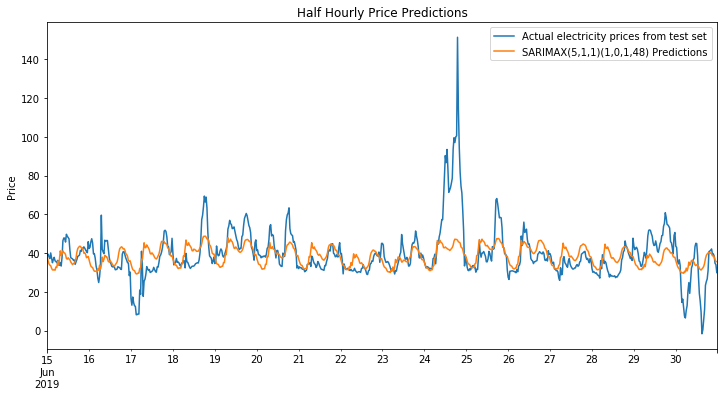

In [87]:
title = 'Half Hourly Price Predictions'
ylabel='Price'
xlabel='' 
ax = test.rename('Actual electricity prices from test set').plot(legend=True,figsize=(12,6),title=title)
predictions_sarima.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);